# Background

A neural network model designed for addressing a fundamental image classification task.

The aim is to develop and train a model capable of taking an image of a handwritten digit as its input and providing a prediction for the digit's class, effectively determining either the digit itself or its corresponding class based on the input image.

In [1]:
import tensorflow as tf

# Print the TensorFlow version
print('Using TensorFlow version', tf.__version__)

# Set the TensorFlow logging verbosity to ERROR level
tf.get_logger().setLevel(tf.compat.v1.logging.ERROR)

2023-10-07 13:48:45.521484: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Using TensorFlow version 2.13.1


In [2]:
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset and store it in mnist_data
mnist_data = mnist.load_data()

# Extract the training data (images and classes) from mnist_data
images_train, classes_train = mnist_data[0]

# Extract the testing data (images and classes) from mnist_data
images_test, classes_test = mnist_data[1]

In [3]:
print('Dimensions of the training data for images: ', images_train.shape)
print('Dimensions of the training data for classes/labels: ', classes_train.shape)
print('Dimensions of the testing data for images: ', images_test.shape)
print('Dimensions of the testing data for classes/labels: ', classes_test.shape)

Dimensions of the training data for images:  (60000, 28, 28)
Dimensions of the training data for classes/labels:  (60000,)
Dimensions of the testing data for images:  (10000, 28, 28)
Dimensions of the testing data for classes/labels:  (10000,)


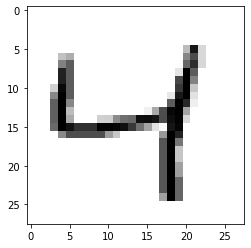

In [4]:
import matplotlib.pyplot as plot
# To display the plot within the Jupyter Notebook
%matplotlib inline                

# Display the 2nd training image from the MNIST dataset in binary color map
plot.imshow(images_train[2], cmap = 'binary')

# Show the image plot
plot.show()

In [5]:
classes_train[2]

4

In [6]:
import numpy as np

# Find unique labels in classes_train
unique_labels = np.unique(classes_train)

# Print the unique labels
print(unique_labels)

[0 1 2 3 4 5 6 7 8 9]


In [7]:
from tensorflow.keras.utils import to_categorical

classes_train_encoded = to_categorical(classes_train)  # one-hot encode the training class labels
classes_test_encoded = to_categorical(classes_test)    # one-hot encode the testing class labels

In [8]:
print('Shape of training set class labels (one-hot encoded):', classes_train_encoded.shape)
print('Shape of testing set class labels (one-hot encoded):', classes_test_encoded.shape)

Shape of training set class labels (one-hot encoded): (60000, 10)
Shape of testing set class labels (one-hot encoded): (10000, 10)


In [9]:
classes_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
# Reshape the training and test images into a 2D array, where each image is represented as a 1D vector

images_train_reshaped = np.reshape(images_train, (len(images_train), -1))
images_test_reshaped = np.reshape(images_test, (len(images_test), -1))

print('Each image now represented as a', images_train_reshaped.shape[1], 'dimensional vector')
print('Training images reshaped to: ', images_train_reshaped.shape)
print('Testing images reshaped to: ', images_test_reshaped.shape)

Each image now represented as a 784 dimensional vector
Training images reshaped to:  (60000, 784)
Testing images reshaped to:  (10000, 784)


In [11]:
print(set(images_train_reshaped[0])) # Unique pixel values in the first reshaped training image

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [12]:
# Mean of the pixel values in the reshaped training images
images_mean = np.mean(images_train_reshaped)

# standard deviation of the pixel values in the reshaped training images
images_std = np.std(images_train_reshaped)

print('Mean of the image data: ', images_mean)
print('Standard deviation of the image data: ', images_std)

Mean of the image data:  33.318421449829934
Standard deviation of the image data:  78.56748998339798


In [13]:
# Define a small epsilon value for numerical stability
epsilon = 1e-10

# Normalize the training images
normalized_images_train = (images_train_reshaped - images_mean)/(images_std + epsilon)

# Normalize the testing images
normalized_images_test = (images_test_reshaped - images_mean)/(images_std + epsilon)

# Print information about the normalization
print('Training images normalized with mean subtraction and scaling')
print('Testing images normalized with mean subtraction and scaling')

Training images normalized with mean subtraction and scaling
Testing images normalized with mean subtraction and scaling


In [14]:
# Unique normalized pixel values in the first normalized training image
print(set(normalized_images_train[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model for a neural network
neural_network_model = Sequential([
    Dense(128, activation = 'relu', input_shape = (784,)),  # Add the first Dense layer
    Dense(128, activation = 'relu'),                        # Add the second Dense layer
    Dense(10, activation = 'softmax')                       # Add the third Dense layer
])

In [16]:
# Compile the neural network model
neural_network_model.compile(
    optimizer = 'sgd',                  # Use stochastic gradient descent (SGD) optimizer for training
    loss = 'categorical_crossentropy',  # Specify categorical cross-entropy as the loss function for multi-class classification
    metrics = ['accuracy']              # 'Accuracy' as the metric to monitor during training
)

neural_network_model.summary()                         # summary of the model architecture

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# Train the neural network model using the fit method

training_history = neural_network_model.fit(
    normalized_images_train,  # Provide the normalized training images as input
    classes_train_encoded,    # Provide the one-hot encoded training class labels as target
    epochs = 3                # Specify the number of training epochs (iterations)
)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3676 - accuracy: 0.8939
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1816 - accuracy: 0.9475
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1358 - accuracy: 0.9599


In [18]:
# Evaluate the trained model on the test data
loss, accuracy = neural_network_model.evaluate(normalized_images_test, classes_test_encoded)

print('Test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.1238 - accuracy: 0.9648
Test set accuracy:  96.48000001907349


In [19]:
# Use the trained model to make predictions on the normalized test data
predictions = neural_network_model.predict(normalized_images_test)

print('Shape of Predictions: ', predictions.shape)

313/313 [==============================] - 1s 2ms/step
Shape of Predictions:  (10000, 10)


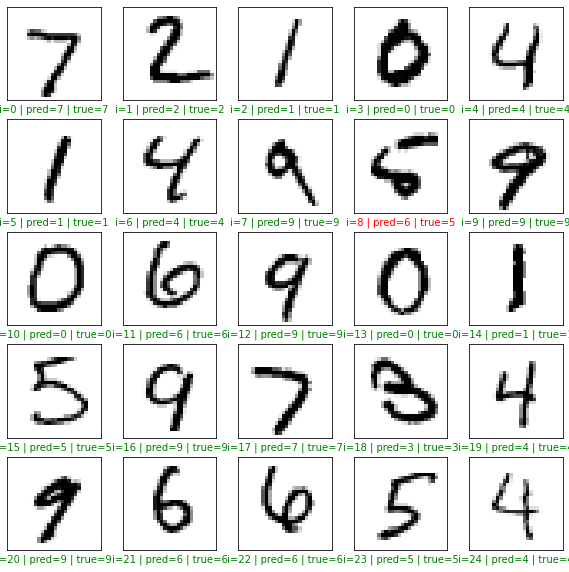

In [20]:
# Create a new figure for plotting with a specified size
plot.figure(figsize = (10, 10))

# Initialize the start index for selecting test examples
start_index = 0

# Loop through a range of 25 to display multiple test images and their predictions
for i in range(25):
    plot.subplot(5, 5, i + 1)     # Create a subplot within a 5x5 grid
    
    # Remove grid lines and tick marks for cleaner visualization
    plot.grid(False)
    plot.xticks([])
    plot.yticks([])
    
    # Get the predicted class (pred) and actual class (actual) for the current test example
    predicted_class = np.argmax(predictions[start_index + i])
    actual_class = np.argmax(classes_test_encoded[start_index + i])
    
    # Set the text color to green (g) if the prediction is correct; otherwise, set it to red (r)
    text_color = 'g'
    if predicted_class != actual_class:
        text_color = 'r'
    
    # Display a label with index, predicted class, and actual class
    plot.xlabel('i={} | pred={} | true={}'.format(start_index + i, predicted_class, actual_class), color = text_color)
    
    # Display the current test image in binary color map
    plot.imshow(images_test[start_index + i], cmap='binary')
    
# Show the plotted images and labels
plot.show()

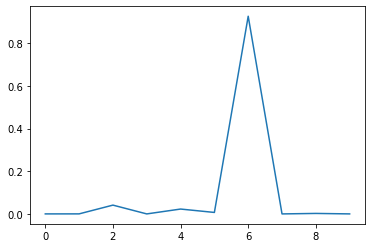

In [21]:
# Replace the value 8 with the index you wish to use to plot the probability scores for prediction.

index = 8

plot.plot(predictions[index])
plot.show()